In [1]:
# load the Advanced Optimization from AC huggingface
from gradio_client import Client
client = Client("AccelerationConsortium/crabnet-hyperparameter")

import numpy as np
import matplotlib.pyplot as plt
import time

Loaded as API: https://accelerationconsortium-crabnet-hyperparameter.hf.space ✔


In [2]:
def adv_opt(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, c1, c2, c3): 
    result = client.predict(
        x1, # float (numeric value between 0.0 and 1.0) in 'x1' Slider component
		x2,	# float (numeric value between 0.0 and 1.0)	in 'x2' Slider component
		x3,	# float (numeric value between 0.0 and 1.0) in 'x3' Slider component
		x4,	# float (numeric value between 0.0 and 1.0) in 'x4' Slider component
		x5,	# float (numeric value between 0.0 and 1.0) in 'x5' Slider component
		x6,	# float (numeric value between 0.0 and 1.0) in 'x6' Slider component
		x7,	# float (numeric value between 0.0 and 1.0) in 'x7' Slider component
		x8,	# float (numeric value between 0.0 and 1.0) in 'x8' Slider component
		x9,	# float (numeric value between 0.0 and 1.0) in 'x9' Slider component
		x10,	# float (numeric value between 0.0 and 1.0) in 'x10' Slider component
		x11,	# float (numeric value between 0.0 and 1.0) in 'x11' Slider component
		x12,	# float (numeric value between 0.0 and 1.0) in 'x12' Slider component
		x13,	# float (numeric value between 0.0 and 1.0) in 'x13' Slider component
		x14,	# float (numeric value between 0.0 and 1.0) in 'x14' Slider component
		x15,	# float (numeric value between 0.0 and 1.0) in 'x15' Slider component
		x16,	# float (numeric value between 0.0 and 1.0) in 'x16' Slider component
		x17,	# float (numeric value between 0.0 and 1.0) in 'x17' Slider component
		x18,	# float (numeric value between 0.0 and 1.0) in 'x18' Slider component
		x19,	# float (numeric value between 0.0 and 1.0) in 'x19' Slider component
		x20,	# float (numeric value between 0.0 and 1.0) in 'x20' Slider component
		c1,	# Literal['c1_0', 'c1_1'] in 'c1' Radio component
		c2,	# Literal['c2_0', 'c2_1'] in 'c2' Radio component
		c3,	# Literal['c3_0', 'c3_1', 'c3_2'] in 'c3' Radio component
		0.5,	# float (numeric value between 0.0 and 1.0) in 'fidelity1' Slider component
		api_name="/predict",
    )
    return result['data'][0][0]			# return y1 value only

In [3]:
random_seed_list = [23, 28, 42, 87, 99, 131, 518, 1047, 1598, 2024]
round = 50

In [4]:
obj = []

for i in range(len(random_seed_list)): 
    # create an empty array
    exp_i = []
    for j in range(round): 
        x1 = np.random.uniform(0, 1)
        x2 = np.random.uniform(0, 1)
        x3 = np.random.uniform(0, 1)
        x4 = np.random.uniform(0, 1)
        x5 = np.random.uniform(0, 1)
        x6 = np.random.uniform(0, 1)
        x7 = np.random.uniform(0, 1)
        x8 = np.random.uniform(0, 1)
        x9 = np.random.uniform(0, 1)
        x10 = np.random.uniform(0, 1)
        x11 = np.random.uniform(0, 1)
        x12 = np.random.uniform(0, 1)
        x13 = np.random.uniform(0, 1)
        x14 = np.random.uniform(0, 1)
        x15 = np.random.uniform(0, 1)
        x16 = np.random.uniform(0, 1)
        x17 = np.random.uniform(0, 1)
        x18 = np.random.uniform(0, 1)
        x19 = np.random.uniform(0, 1)
        x20 = np.random.uniform(0, 1)
        c1 = np.random.choice(['c1_0', 'c1_1'])
        c2 = np.random.choice(['c2_0', 'c2_1'])
        c3 = np.random.choice(['c3_0', 'c3_1', 'c3_2'])
        
        # constraints: 
        # x19 < x20
        # x6 + x15 ≤ 1.0
        # if the constraints are meet, calculate y1, 
        # if constraints not meet, select x19, x20, x6, x15 again
        while x19 >= x20 or x6 + x15 > 1.0: 
            x19 = np.random.uniform(0, 1)
            x20 = np.random.uniform(0, 1)
            x6 = np.random.uniform(0, 1)
            x15 = np.random.uniform(0, 1)

        y1 = adv_opt(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, c1, c2, c3)
        
        # wait 60 seconds before next iteration <---------
        time.sleep(30)

        exp_i.append(y1)
    obj.append(np.array(exp_i))

In [6]:
len(obj)

10

In [7]:
np.savetxt('AdvOpt-random.csv', obj)

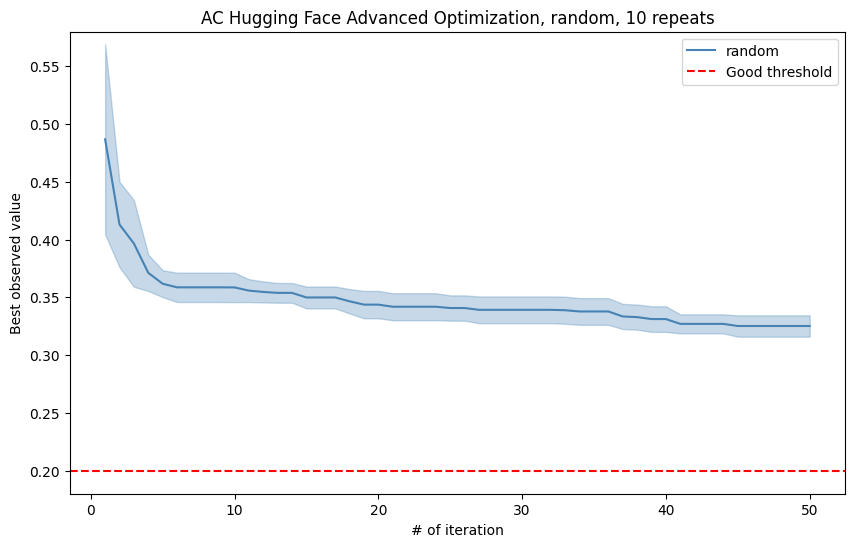

In [4]:
import matplotlib.pyplot as plt
import numpy as np

ax_data = np.loadtxt('AdvOpt-random.csv')
data = [ax_data] 
means = {}
stds = {}
for m, d in enumerate(data):
    x = d.copy()
    best_obj = np.array([np.minimum.accumulate(obj_i) for obj_i in x])
    means[m] = best_obj.mean(axis=0)
    stds[m] = best_obj.std(axis=0) / np.sqrt(best_obj.shape[0])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
x = np.arange(1, len(means[0]) + 1)
colors = ['steelblue']
methods = ['random']
for i, algo in enumerate(methods):
    ax.plot(x, means[i], label=algo, c=colors[i])
    ax.fill_between(x, means[i] - 2 * stds[i], means[i] + 2 * stds[i], color=colors[i], alpha=0.3)
ax.axhline(y = 0.2, c = 'r', ls = '--', label = "Good threshold")
ax.set_xlabel('# of iteration')
ax.set_ylabel('Best observed value')
ax.set_title('AC Hugging Face Advanced Optimization, random, 10 repeats')
ax.set_ylim(0.18, 0.58)
ax.legend()